In [7]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data

from lifelines import \
     (KaplanMeierFitter,
      CoxPHFitter)
from lifelines.statistics import \
     (logrank_test,
      multivariate_logrank_test)
from ISLP.survival import sim_time

In [5]:
# Input the given data
data = pd.DataFrame({
    'observation_Y': [26.5, 37.2, 57.3, 90.8, 20.2,89.8],
    'censoring_indicator_delta': [1, 1, 1, 0, 0, 0],
    'covariate_X': [0.1, 11, -0.3, 2.8, 1.8, 0.4]
})

print(data.columns)
print(data.head())

# Divide the data into two Groups, X>=2 and X<2
group1 = data[data['covariate_X'] >= 2]
group2 = data[data['covariate_X'] < 2]

print("Group 1 (X >= 2):")
print(group1)
print("\nGroup 2 (X < 2):")
print(group2)

Index(['observation_Y', 'censoring_indicator_delta', 'covariate_X'], dtype='object')
   observation_Y  censoring_indicator_delta  covariate_X
0           26.5                          1          0.1
1           37.2                          1         11.0
2           57.3                          1         -0.3
3           90.8                          0          2.8
4           20.2                          0          1.8
Group 1 (X >= 2):
   observation_Y  censoring_indicator_delta  covariate_X
1           37.2                          1         11.0
3           90.8                          0          2.8

Group 2 (X < 2):
   observation_Y  censoring_indicator_delta  covariate_X
0           26.5                          1          0.1
2           57.3                          1         -0.3
4           20.2                          0          1.8
5           89.8                          0          0.4


Text(0, 0.5, 'Probability')

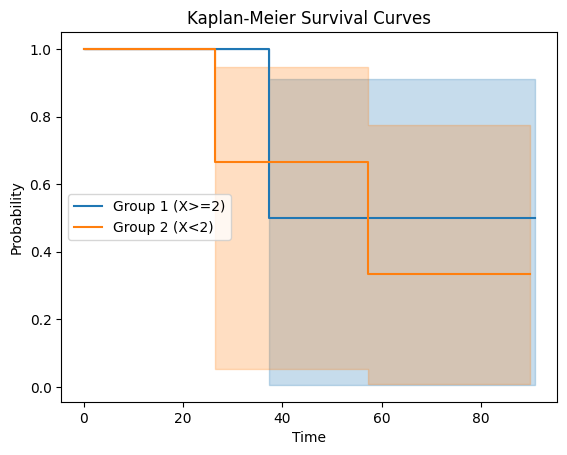

In [11]:
# plot the Kaplan-Meier survival curves for both groups
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

km_group1 = kmf1.fit(group1['observation_Y'],group1['censoring_indicator_delta'], label='Group 1 (X >= 2)')
km_group2 = kmf2.fit(group2['observation_Y'],group2['censoring_indicator_delta'], label='Group 2 (X < 2)')

fig, ax = subplots()
km_group1.plot(label = 'Group 1 (X>=2)', ax=ax)
km_group2.plot(label = 'Group 2 (X<2)', ax=ax)
ax.set_title('Kaplan-Meier Survival Curves')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
# Show the plot

## Part (b)

In [ ]:
# Fit Cox Proportional Hazards model
# 1st: create a feature indicate the group
data['group'] = np.where(data['covariate_X'] >= 2, 1, 0)
print(data.columns)
print(data.head())

coxph = CoxPHFitter # shorthand
group_df = data[['observation_Y', 'censoring_indicator_delta', 'group']]
model_df = MS(['observation_Y', 'censoring_indicator_delta', 'group'],
              intercept=False).fit_transform(group_df)

cox_fit = coxph().fit(model_df,
                      'observation_Y',
                      'censoring_indicator_delta')
cox_fit.summary[['coef', 'se(coef)', 'p']]

Index(['observation_Y', 'censoring_indicator_delta', 'covariate_X', 'group'], dtype='object')
   observation_Y  censoring_indicator_delta  covariate_X  group
0           26.5                          1          0.1      0
1           37.2                          1         11.0      1
2           57.3                          1         -0.3      0
3           90.8                          0          2.8      1
4           20.2                          0          1.8      0
